In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("D:/DWDA/study_performance.csv")

In [9]:
# 1 Understand data (variables)

In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
data.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
data.shape

(1000, 8)

In [13]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [20]:
data['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [21]:
# 2 Cleaning Data

In [24]:
data.isnull()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [25]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [28]:
# Dropping redundant data
student = data.drop(['race_ethnicity','parental_level_of_education'], axis = 1)

In [29]:
student.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [30]:
# Check outliers
# An outlier is a data point that differs significantly from other observations
# It is due to variability in measurement or it may indicate experimental error 
# Outlier can cause serious problems in statistical analysis 

In [31]:
# 3 Relationship Analysis

In [36]:
# Correlation matrix
# It is a table showing correlation coefficients between variables & each cell in the table shows the correlation between 2 variables
# It is used to summarize data as an input into more advanced analysis & also a diagnostic for advanced analysis

correlation = student.select_dtypes(include='number').corr()
print(correlation)

               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


<Axes: >

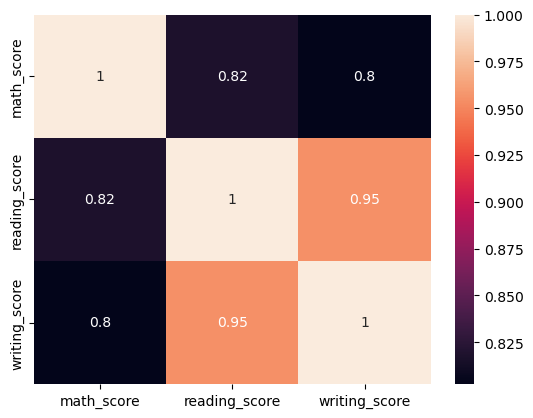

In [38]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

C:\Users\prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


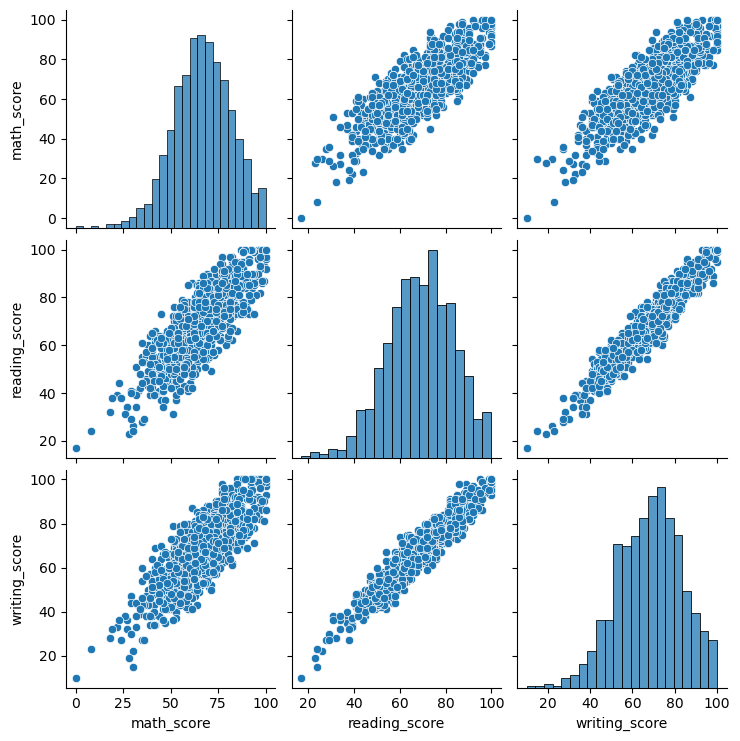

In [39]:
sns.pairplot(student)

C:\Users\prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


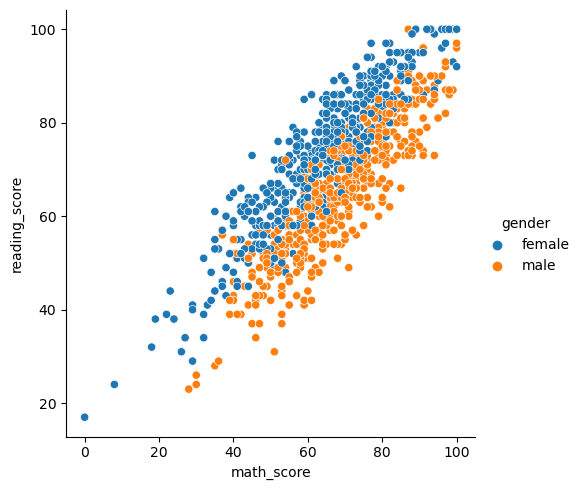

In [40]:
# Relation between two variables
sns.relplot(x = 'math_score', y = 'reading_score', hue = 'gender', data = student)

C:\Users\prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


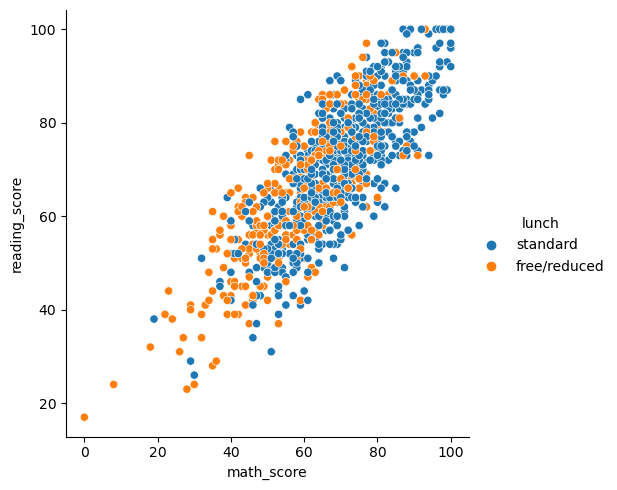

In [41]:
sns.relplot(x = 'math_score', y = 'reading_score', hue = 'lunch', data = student)

C:\Users\prani\AppData\Local\Temp\ipykernel_15824\3631766117.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['math_score'])


<Axes: xlabel='math_score', ylabel='Density'>

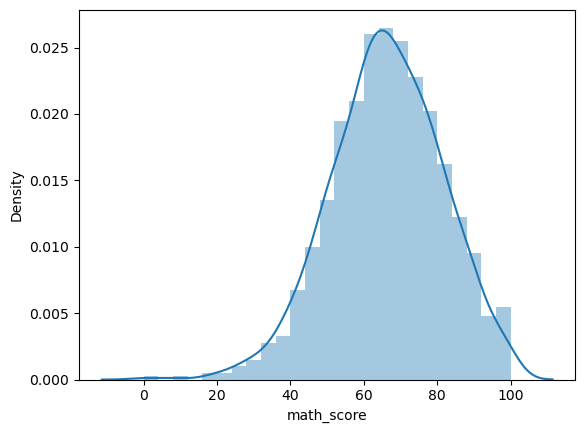

In [43]:
# Histogram
sns.distplot(student['math_score'])

C:\Users\prani\AppData\Local\Temp\ipykernel_15824\125703483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['reading_score'])


<Axes: xlabel='reading_score', ylabel='Density'>

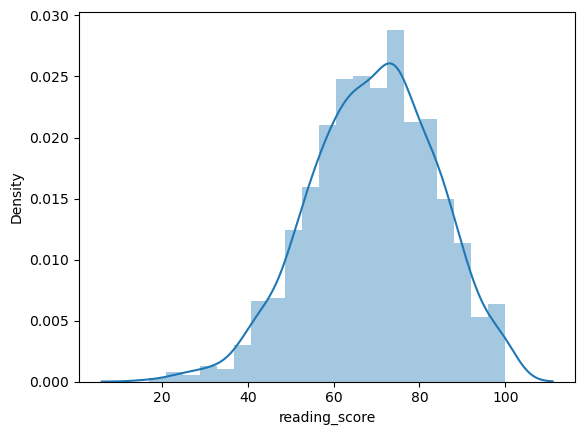

In [44]:
sns.distplot(student['reading_score'])

C:\Users\prani\AppData\Local\Temp\ipykernel_15824\2423713684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['writing_score'], bins = 5)


<Axes: xlabel='writing_score', ylabel='Density'>

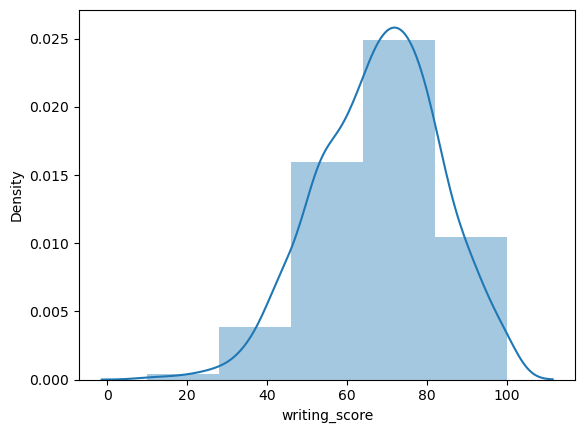

In [46]:
sns.distplot(student['writing_score'], bins = 5)
# bins = 5 means having 5 divisions

C:\Users\prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


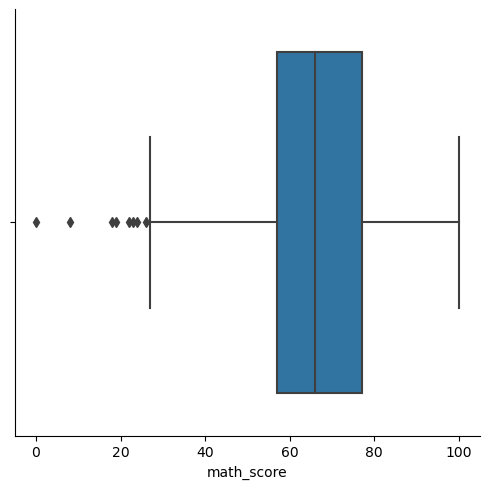

In [48]:
# Categorical plot
sns.catplot(x = 'math_score', kind = 'box', data = student)

C:\Users\prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


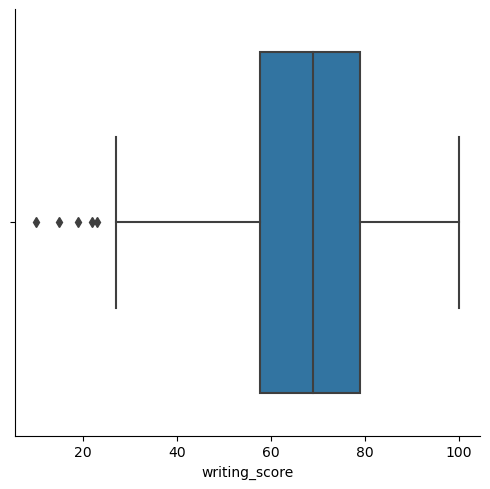

In [49]:
sns.catplot(x = 'writing_score', kind = 'box', data = student)